In [2]:
# import des packages nécessaires à l'exécution du code 

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

## Modèles naïfs

In [3]:
df_model = pd.read_csv('data_cleaned.csv')

In [4]:
X = df_model.drop(['price','date'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

regression = linear_model.LinearRegression()


regression.fit(X_train, y_train)
regression.predict(X_test)
regression.score(X_test, y_test)

0.88581251325

In [5]:
X = df_model.drop(['price','date'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

knn = KNeighborsRegressor()


knn.fit(X_train, y_train)
knn.predict(X_test)
knn.score(X_test, y_test)

0.35799355052515125

## Modèle 1 - Régression linéaire avec valeurs extrêmes, avec des variables qu'on ne peut pas demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition
- zipcode

Preprocessing : 
- MinMaxScaler
- Onehotencoding

Problème :
- variables que l'utilisateur ne connait pas

In [6]:
df_model = pd.read_csv('data_cleaned.csv')


In [7]:
df_model.dtypes

date             object
id                int64
price           float64
bedrooms          int64
bathrooms       float64
m2_living       float64
m2_lot          float64
floors          float64
waterfront        int64
view              int64
condition         int64
grade             int64
m2_above        float64
m2_basement     float64
yr_built          int64
yr_renovated      int64
zipcode           int64
lat             float64
long            float64
m2_living15     float64
m2_lot15        float64
price_m2        float64
dtype: object

In [8]:
df_model.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2516.239882
3,2014-12-09,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3317.043210
4,2015-02-18,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3267.617069


In [9]:
X = df_model.drop(['date','price','id'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [10]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
predictions = trained_pipe.predict(X_test)

In [12]:
trained_pipe.score(X_test, y_test)

0.8998676630605593

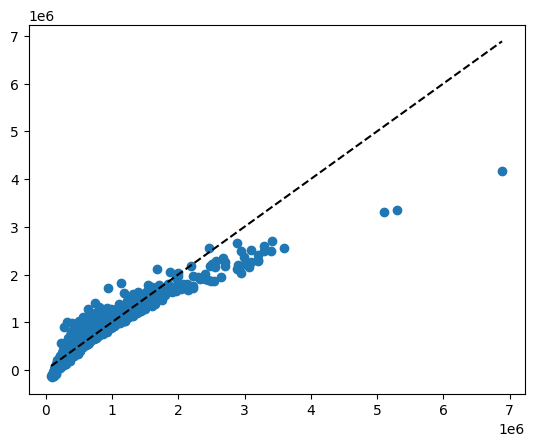

In [13]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


In [14]:
predictions

array([275953.45303011, 335786.36569874, 544806.13485313, ...,
       355212.3743482 , 683610.98213834, 530353.34794226])

In [15]:
y_test

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64

## Modèle 2 - Régression linéaire sans valeur extrême, avec variables qu'on ne peut pas demander à l'utilisateur

Ce modèle sera celui qui ne contient pas les valeurs extrêmes : plus précis mais plus restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition

In [16]:
df_model_filtre = pd.read_csv('data_cleaned2.csv')


In [17]:
df_model_filtre.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.625540,524.901950,1.0,0,0,...,109.625540,0.0000,1955,0,98178,47.5112,-122.257,124.490020,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.760710,672.803526,2.0,0,0,...,201.599510,37.1612,1951,1991,98125,47.7210,-122.319,157.006070,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.535310,929.030000,1.0,0,0,...,71.535310,0.0000,1933,0,98028,47.7379,-122.233,252.696160,748.983986,2516.239882
3,2015-02-18,1954400510,510000.0,3,2.00,156.077040,750.656240,1.0,0,0,...,156.077040,0.0000,1987,0,98074,47.6168,-122.045,167.225400,697.051209,3267.617069
4,2014-06-27,1321400060,257500.0,3,2.25,159.328645,633.505557,2.0,0,0,...,159.328645,0.0000,1995,0,98003,47.3097,-122.327,207.916914,633.505557,1616.156342


In [18]:
X = df_model_filtre.drop(['date','price','id'], axis=1)
y = df_model_filtre['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [19]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [20]:
predictions = trained_pipe.predict(X_test)

In [21]:
trained_pipe.score(X_test, y_test)

0.920456369131554

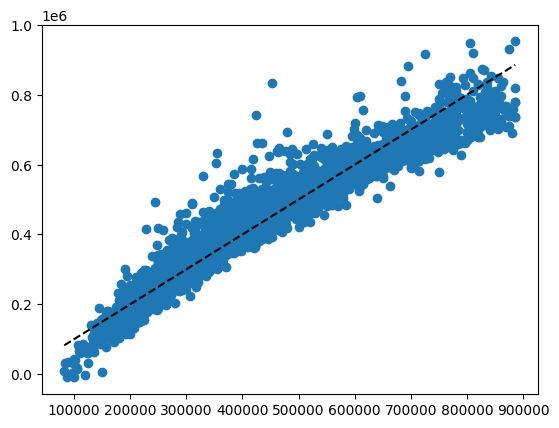

In [22]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


In [23]:
predictions

array([185298.85394761, 753190.92599773, 317749.02710039, ...,
       492660.24005899, 237086.36356666, 264586.3044654 ])

In [24]:
y_test

9127     209000.0
4042     689000.0
11468    260000.0
1388     340000.0
7151     306000.0
           ...   
14972    575000.0
16406    490000.0
14109    455000.0
4446     243400.0
15867    244950.0
Name: price, Length: 3590, dtype: float64

## Modèle 3 - KNN avec valeurs extrêmes, avec valeurs qu'on ne peut pas demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition

In [67]:
df_model = pd.read_csv('data_cleaned.csv')


In [68]:
X = df_model.drop(['date','price','id','price_m2'], axis=1)
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)
knn = grid.best_estimator_

pipe = Pipeline([
    ('prep',preprocessor),
    ('knn',knn)
                
])

print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 9}


In [69]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [70]:
predictions = trained_pipe.predict(X_test)

In [71]:
trained_pipe.score(X_test, y_test)

0.7845614122513722

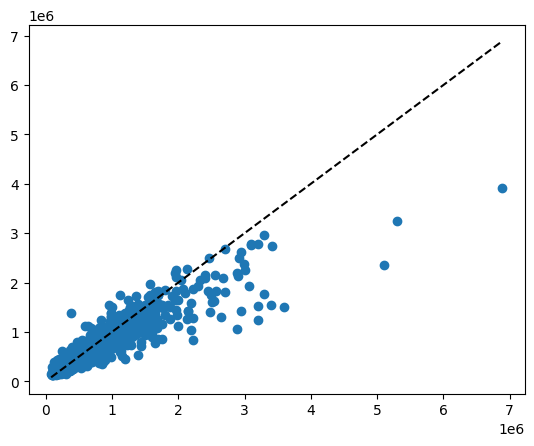

In [30]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


In [31]:
predictions

array([227862.5, 377337.5, 538125. , ..., 390125. , 720750. , 368375. ])

In [32]:
y_test

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64

## Modèle 4 - KNN sans valeur extrême, avec des variables qu'on ne peut pas demander aux utilisateurs

Ce modèle sera celui qui ne contient pas les valeurs extrêmes : plus précis mais plus restrictif. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- m2_living15
- price_m2
- view
- m2_basement
- waterfront
- floors
- m2_lot
- m2_lot15
- condition

Préprocessing : 
- MinMaxScaler 
- Onehotencoding
- GridSearchCv

In [33]:
df_model_filtre = pd.read_csv('data_cleaned2.csv')


In [34]:
df_model_filtre.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.625540,524.901950,1.0,0,0,...,109.625540,0.0000,1955,0,98178,47.5112,-122.257,124.490020,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.760710,672.803526,2.0,0,0,...,201.599510,37.1612,1951,1991,98125,47.7210,-122.319,157.006070,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.535310,929.030000,1.0,0,0,...,71.535310,0.0000,1933,0,98028,47.7379,-122.233,252.696160,748.983986,2516.239882
3,2015-02-18,1954400510,510000.0,3,2.00,156.077040,750.656240,1.0,0,0,...,156.077040,0.0000,1987,0,98074,47.6168,-122.045,167.225400,697.051209,3267.617069
4,2014-06-27,1321400060,257500.0,3,2.25,159.328645,633.505557,2.0,0,0,...,159.328645,0.0000,1995,0,98003,47.3097,-122.327,207.916914,633.505557,1616.156342


In [35]:
X = df_model_filtre.drop(['date','price','id'], axis=1)
y = df_model_filtre['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)
knn = grid.best_estimator_

pipe = Pipeline([
    ('prep',preprocessor),
    ('knn',knn)
                
])

In [36]:
print(grid.best_estimator_)

KNeighborsRegressor(metric='manhattan', n_neighbors=6)


In [37]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
predictions = trained_pipe.predict(X_test)

In [39]:
trained_pipe.score(X_test, y_test)

0.8473360247042774

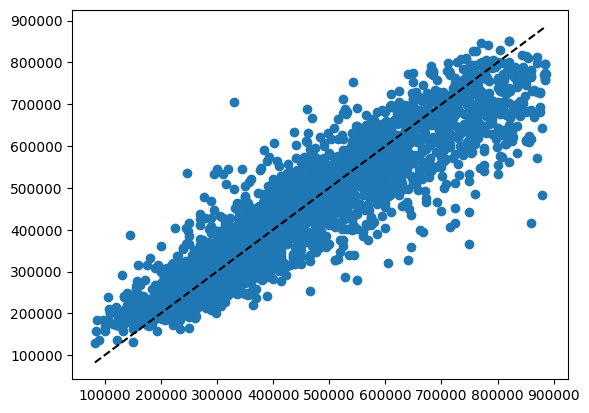

In [40]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


In [41]:
predictions

array([217233.33333333, 733416.5       , 316816.66666667, ...,
       438050.        , 226733.33333333, 275983.33333333])

In [42]:
y_test

9127     209000.0
4042     689000.0
11468    260000.0
1388     340000.0
7151     306000.0
           ...   
14972    575000.0
16406    490000.0
14109    455000.0
4446     243400.0
15867    244950.0
Name: price, Length: 3590, dtype: float64

## Modèle 5 - Régression linéaire, avec valeurs extrêmes, uniquement variables qu'on peut demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, lat, long, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder

In [43]:
df_model = pd.read_csv('data_cleaned.csv')

In [44]:
df_model.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2516.239882
3,2014-12-09,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3317.043210
4,2015-02-18,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3267.617069


In [45]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [46]:
X_train.head()

,m2_living,grade,view,m2_above,bathrooms,zipcode,m2_basement,bedrooms,waterfront,floors,yr_renovated,m2_lot,yr_built,condition
20866,153.28995,8,0,153.28995,2.50,98133,0.0000,3,0,3.0,0,204.479503,2007,3
978,118.91584,7,0,118.91584,1.00,98003,0.0000,3,0,1.0,0,809.370936,1956,4
14161,152.36092,7,0,152.36092,2.00,98042,0.0000,3,0,1.0,0,524.901950,2003,3
18477,132.85129,8,0,132.85129,1.75,98024,0.0000,3,0,2.0,0,4982.202084,1985,3
3478,163.50928,7,0,89.18688,2.00,98199,74.3224,3,0,1.0,0,464.515000,1920,5


In [47]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
predictions = trained_pipe.predict(X_test)

In [49]:
trained_pipe.score(X_test, y_test)

0.8815547754236779

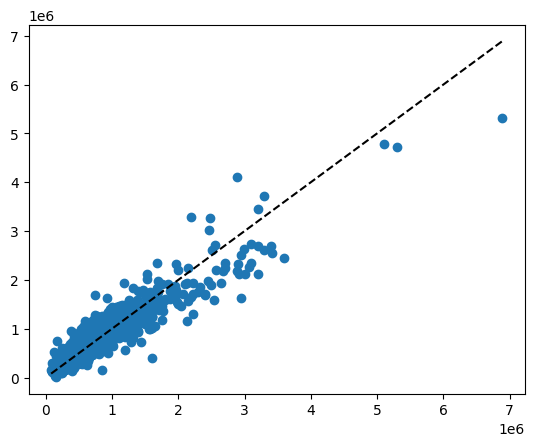

In [50]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


In [51]:
predictions

array([282256., 313976., 505784., ..., 373712., 676864., 477688.])

In [52]:
y_test

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64

## Modèle  - Régression linéaire, sans valeurs extrêmes, uniquement variables qu'on peut demander à l'utilisateur

Ce modèle sera celui qui ne contient pas les valeurs extrêmes : plus précis mais plus restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- les différentes surfaces (m2_living, m2_above,m2_basement,m2_lot)
- le nombre de pièces (bedrooms,bathrooms) et d'étages (floors)
- les années de construction, rénovation
- les notes obtenues sur différents sujets (grade,condition,view)
- localisation (zipcode, waterfront)

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder

In [53]:
df_model_filtre = pd.read_csv('data_cleaned2.csv')

In [54]:
df_model_filtre.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.625540,524.901950,1.0,0,0,...,109.625540,0.0000,1955,0,98178,47.5112,-122.257,124.490020,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.760710,672.803526,2.0,0,0,...,201.599510,37.1612,1951,1991,98125,47.7210,-122.319,157.006070,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.535310,929.030000,1.0,0,0,...,71.535310,0.0000,1933,0,98028,47.7379,-122.233,252.696160,748.983986,2516.239882
3,2015-02-18,1954400510,510000.0,3,2.00,156.077040,750.656240,1.0,0,0,...,156.077040,0.0000,1987,0,98074,47.6168,-122.045,167.225400,697.051209,3267.617069
4,2014-06-27,1321400060,257500.0,3,2.25,159.328645,633.505557,2.0,0,0,...,159.328645,0.0000,1995,0,98003,47.3097,-122.327,207.916914,633.505557,1616.156342


In [55]:
X = df_model_filtre[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model_filtre['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

regression = linear_model.LinearRegression()

pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

In [56]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [57]:
predictions = trained_pipe.predict(X_test)

In [58]:
trained_pipe.score(X_test, y_test)

0.8287499492739231

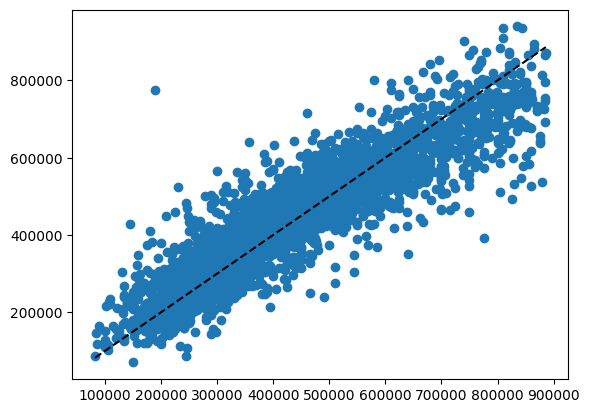

In [59]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


## Modèle 6 - KNN, avec valeurs extrêmes, uniquement variables qu'on peut demander à l'utilisateur

Ce modèle sera celui qui contient les valeurs extrêmes : moins précis mais moins restrictif. On prend ici en compte les zipcode et non latitude/longitude. Les features sont : 
- bedrooms
- bathrooms
- m2_living 
- yr_renovated
- yr-built
- grade
- m2_above
- view
- m2_basement
- waterfront
- floors
- m2_lot
- condition
- zipcode

J'ai retiré les features qu'il ne paraît pas logique de demander à un propriétaire, qu'il aurait du mal à connaître.

Preprocessing : 
- MinMaxScaler
- PolynomialFeature
- OneHotEncoder

In [60]:
df_model = pd.read_csv('data_cleaned.csv')


In [61]:
df_model.head(5)

,date,id,price,bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,...,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,price_m2
0,2014-10-13,7129300520,221900.0,3,1.00,109.62554,524.901950,1.0,0,0,...,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2024.163347
1,2014-12-09,6414100192,538000.0,3,2.25,238.76071,672.803526,2.0,0,0,...,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2253.302061
2,2015-02-25,5631500400,180000.0,2,1.00,71.53531,929.030000,1.0,0,0,...,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2516.239882
3,2014-12-09,2487200875,604000.0,4,3.00,182.08988,464.515000,1.0,0,0,...,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,3317.043210
4,2015-02-18,1954400510,510000.0,3,2.00,156.07704,750.656240,1.0,0,0,...,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,3267.617069


In [62]:
X = df_model[['lat','long','m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

numeric_features = list(X.select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode']

numeric_transformer = Pipeline([
    ('min_max', MinMaxScaler())
])

catagorical_transformer = OneHotEncoder(sparse=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'n_neighbors':np.arange(1,20),
             'metric':['euclidean','manhattan']}

grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)
knn = grid.best_estimator_

knn = KNeighborsRegressor()

pipe = Pipeline([
    ('prep',preprocessor),
    ('knn',knn)
                
])

print(grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 7}


In [63]:
trained_pipe = pipe.fit(X_train, y_train)

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [64]:
predictions = trained_pipe.predict(X_test)

In [65]:
trained_pipe.score(X_test, y_test)

0.7487576780441314

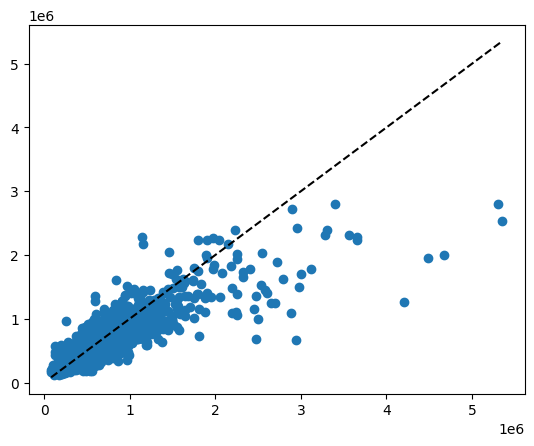

In [66]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
